In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)  12, 9 или 40 20

In [3]:
df = pd.read_csv('http://invidio.drl.pl/files/german_credit.csv')

In [4]:
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [5]:
df.shape

(1000, 21)

In [6]:
X = df.drop(['default'], axis = 1)
y = df.default

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [8]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
df.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [10]:
y.replace([0,1], [1,0], inplace=True)

In [11]:
y.value_counts(normalize = True)

1    0.7
0    0.3
Name: default, dtype: float64

In [12]:
y.value_counts(dropna=False)

1    700
0    300
Name: default, dtype: int64

In [13]:
num_rows = len(df.index)
low_inf = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_inf.append(col)
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

other_debtors: 90.70%
none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

foreign_worker: 96.30%
yes    963
no      37
Name: foreign_worker, dtype: int64



In [14]:
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())
    print()

account_check_status : ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']

credit_history : ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']

purpose : ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']

savings : ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']

present_emp_since : ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']

personal_status_sex : ['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']

other_debtors : ['none' 'guarantor' 'co-applicant']

property : ['real 

In [15]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(df[column].value_counts(dropna=False))
    print()

default
1    700
0    300
Name: default, dtype: int64

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

duration_in_month
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration_in_month, dtype: int64

credit_history
existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly        

In [16]:
correl = df.corr()['default'].sort_values()
print(correl)

duration_in_month            -0.214927
credit_amount                -0.154739
installment_as_income_perc   -0.072404
present_res_since            -0.002967
people_under_maintenance      0.003015
credits_this_bank             0.045732
age                           0.091127
default                       1.000000
Name: default, dtype: float64


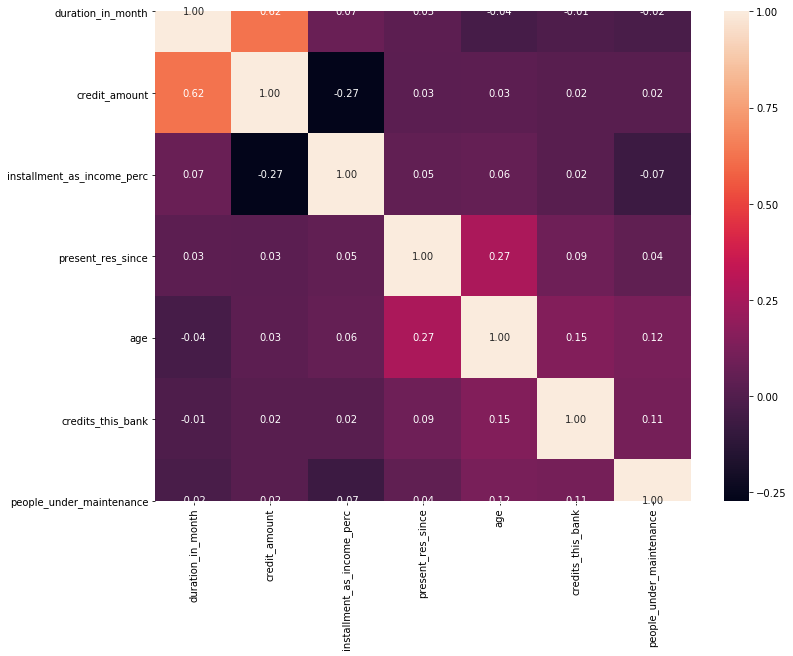

In [17]:
Corr = X.corr()
sns.heatmap(Corr, annot = True, fmt = '.2f')

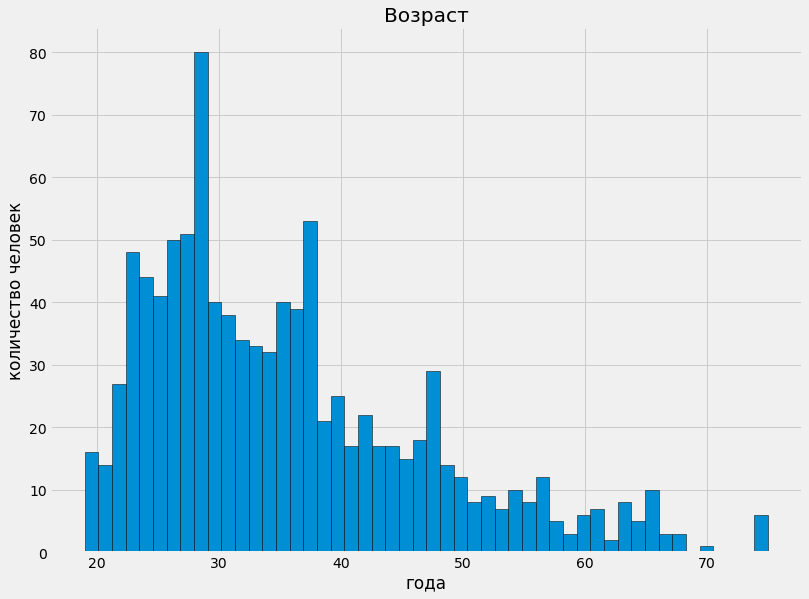

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(X['age'].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('года'); plt.ylabel('количество человек'); 
plt.title('Возраст');

In [19]:
df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [20]:
X.drop(['foreign_worker'], axis = 1, inplace = True)
X.drop(['other_debtors'], axis = 1, inplace = True)
X.drop(['people_under_maintenance'], axis = 1, inplace = True)
X.drop(['credits_this_bank'], axis = 1, inplace = True)

In [21]:
X.head

<bound method NDFrame.head of     account_check_status  duration_in_month  \
0                 < 0 DM                  6   
1      0 <= ... < 200 DM                 48   
2    no checking account                 12   
3                 < 0 DM                 42   
4                 < 0 DM                 24   
..                   ...                ...   
995  no checking account                 12   
996               < 0 DM                 30   
997  no checking account                 12   
998               < 0 DM                 45   
999    0 <= ... < 200 DM                 45   

                                        credit_history  \
0    critical account/ other credits existing (not ...   
1             existing credits paid back duly till now   
2    critical account/ other credits existing (not ...   
3             existing credits paid back duly till now   
4                      delay in paying off in the past   
..                                                 ...   

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LE = LabelEncoder()
X["account_check_status"] = LE.fit_transform(X["account_check_status"])
X["credit_history"] = LE.fit_transform(X["credit_history"])
X["purpose"] = LE.fit_transform(X["purpose"])
X["savings"] = LE.fit_transform(X["savings"])
X["present_emp_since"] = LE.fit_transform(X["present_emp_since"])
X["personal_status_sex"] = LE.fit_transform(X["personal_status_sex"])
X["property"] = LE.fit_transform(X["property"])
X["other_installment_plans"] = LE.fit_transform(X["other_installment_plans"])
X["housing"] = LE.fit_transform(X["housing"])
X["job"] = LE.fit_transform(X["job"])
X["telephone"] = LE.fit_transform(X["telephone"])

In [24]:
X.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,present_res_since,property,age,other_installment_plans,housing,job,telephone
0,1,6,1,4,1169,4,0,4,3,4,2,67,1,1,1,1
1,0,48,3,4,5951,1,2,2,0,2,2,22,1,1,1,0
2,3,12,1,0,2096,1,3,2,3,3,2,49,1,1,3,0
3,1,42,3,7,7882,1,3,2,3,4,0,45,1,0,1,0
4,1,24,2,2,4870,1,2,3,3,4,3,53,1,0,1,0


In [25]:
X.isnull().sum()

account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
job                           0
telephone                     0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = df['default'])

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [29]:
y_train.value_counts(normalize = True)

1    0.7
0    0.3
Name: default, dtype: float64

In [30]:
y_test.value_counts(normalize = True)

1    0.7
0    0.3
Name: default, dtype: float64

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=13)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [34]:
knn.score(X_train, y_train)

0.72625

In [35]:
knn.score(X_test, y_test)

0.715

In [36]:
from sklearn import tree

In [37]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
clf.score(X_train, y_train)

1.0

In [40]:
clf.score(X_test, y_test)

0.715

In [41]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [42]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
clf.score(X_train, y_train)

0.79

In [44]:
clf.score(X_test, y_test)

0.745

In [45]:
max_depth_values = range(1, 30)
scores_df = pd.DataFrame()

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_df = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_df = scores_df.append(temp_score_df, sort=False)

In [48]:
scores_df.head(7)

,max_depth,train_score,test_score,cross_val_score
0,1,0.70000,0.700,0.70000
0,2,0.70000,0.700,0.69750
0,3,0.73875,0.720,0.69375
0,4,0.77875,0.720,0.71250
0,5,0.79000,0.745,0.73000
0,6,0.81125,0.750,0.70500
0,7,0.83125,0.705,0.69500


In [49]:
scores_df_long = pd.melt(scores_df, id_vars = ['max_depth'], value_vars = ["train_score", 'test_score',  
                                        'cross_val_score'],var_name = 'set_type', value_name = 'score')

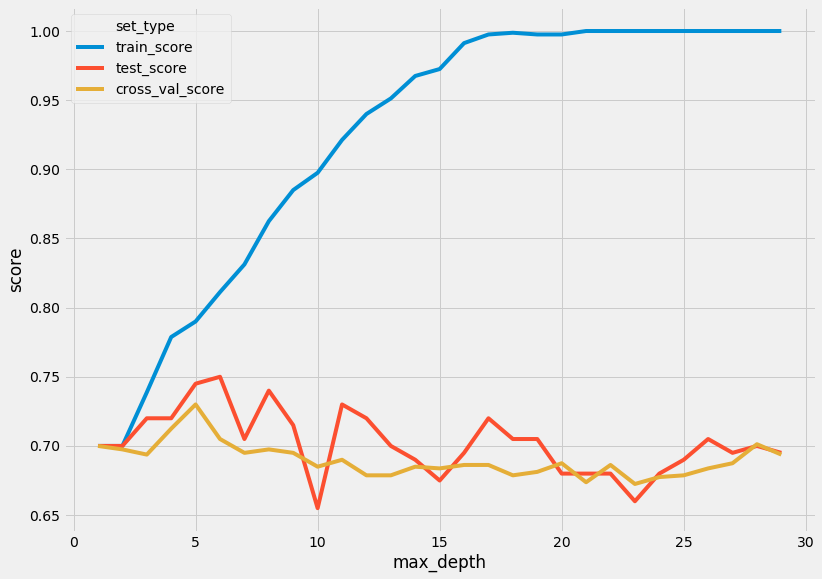

In [50]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_df_long)

In [51]:
scores_df_long.query("set_type == 'cross_val_score'").head(10)

,max_depth,set_type,score
58,1,cross_val_score,0.70000
59,2,cross_val_score,0.69750
60,3,cross_val_score,0.69375
61,4,cross_val_score,0.71250
62,5,cross_val_score,0.73000
63,6,cross_val_score,0.70500
64,7,cross_val_score,0.69500
65,8,cross_val_score,0.69750
66,9,cross_val_score,0.69500
67,10,cross_val_score,0.68500


In [52]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [53]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
best_clf.score(X_test, y_test)

0.745

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
clf = tree.DecisionTreeClassifier()

In [57]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(3, 15)}

In [58]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [59]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 15)},
             pre_dispatc

In [60]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [61]:
best_clf = grid_search_cv_clf.best_estimator_

In [62]:
best_clf.score(X_test, y_test)

0.745

In [63]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [64]:
y_pred = best_clf.predict(X_test)

In [65]:
precision_score(y_test, y_pred)

0.7908496732026143

In [66]:
recall_score(y_test, y_pred)

0.8642857142857143

In [67]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=10)

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

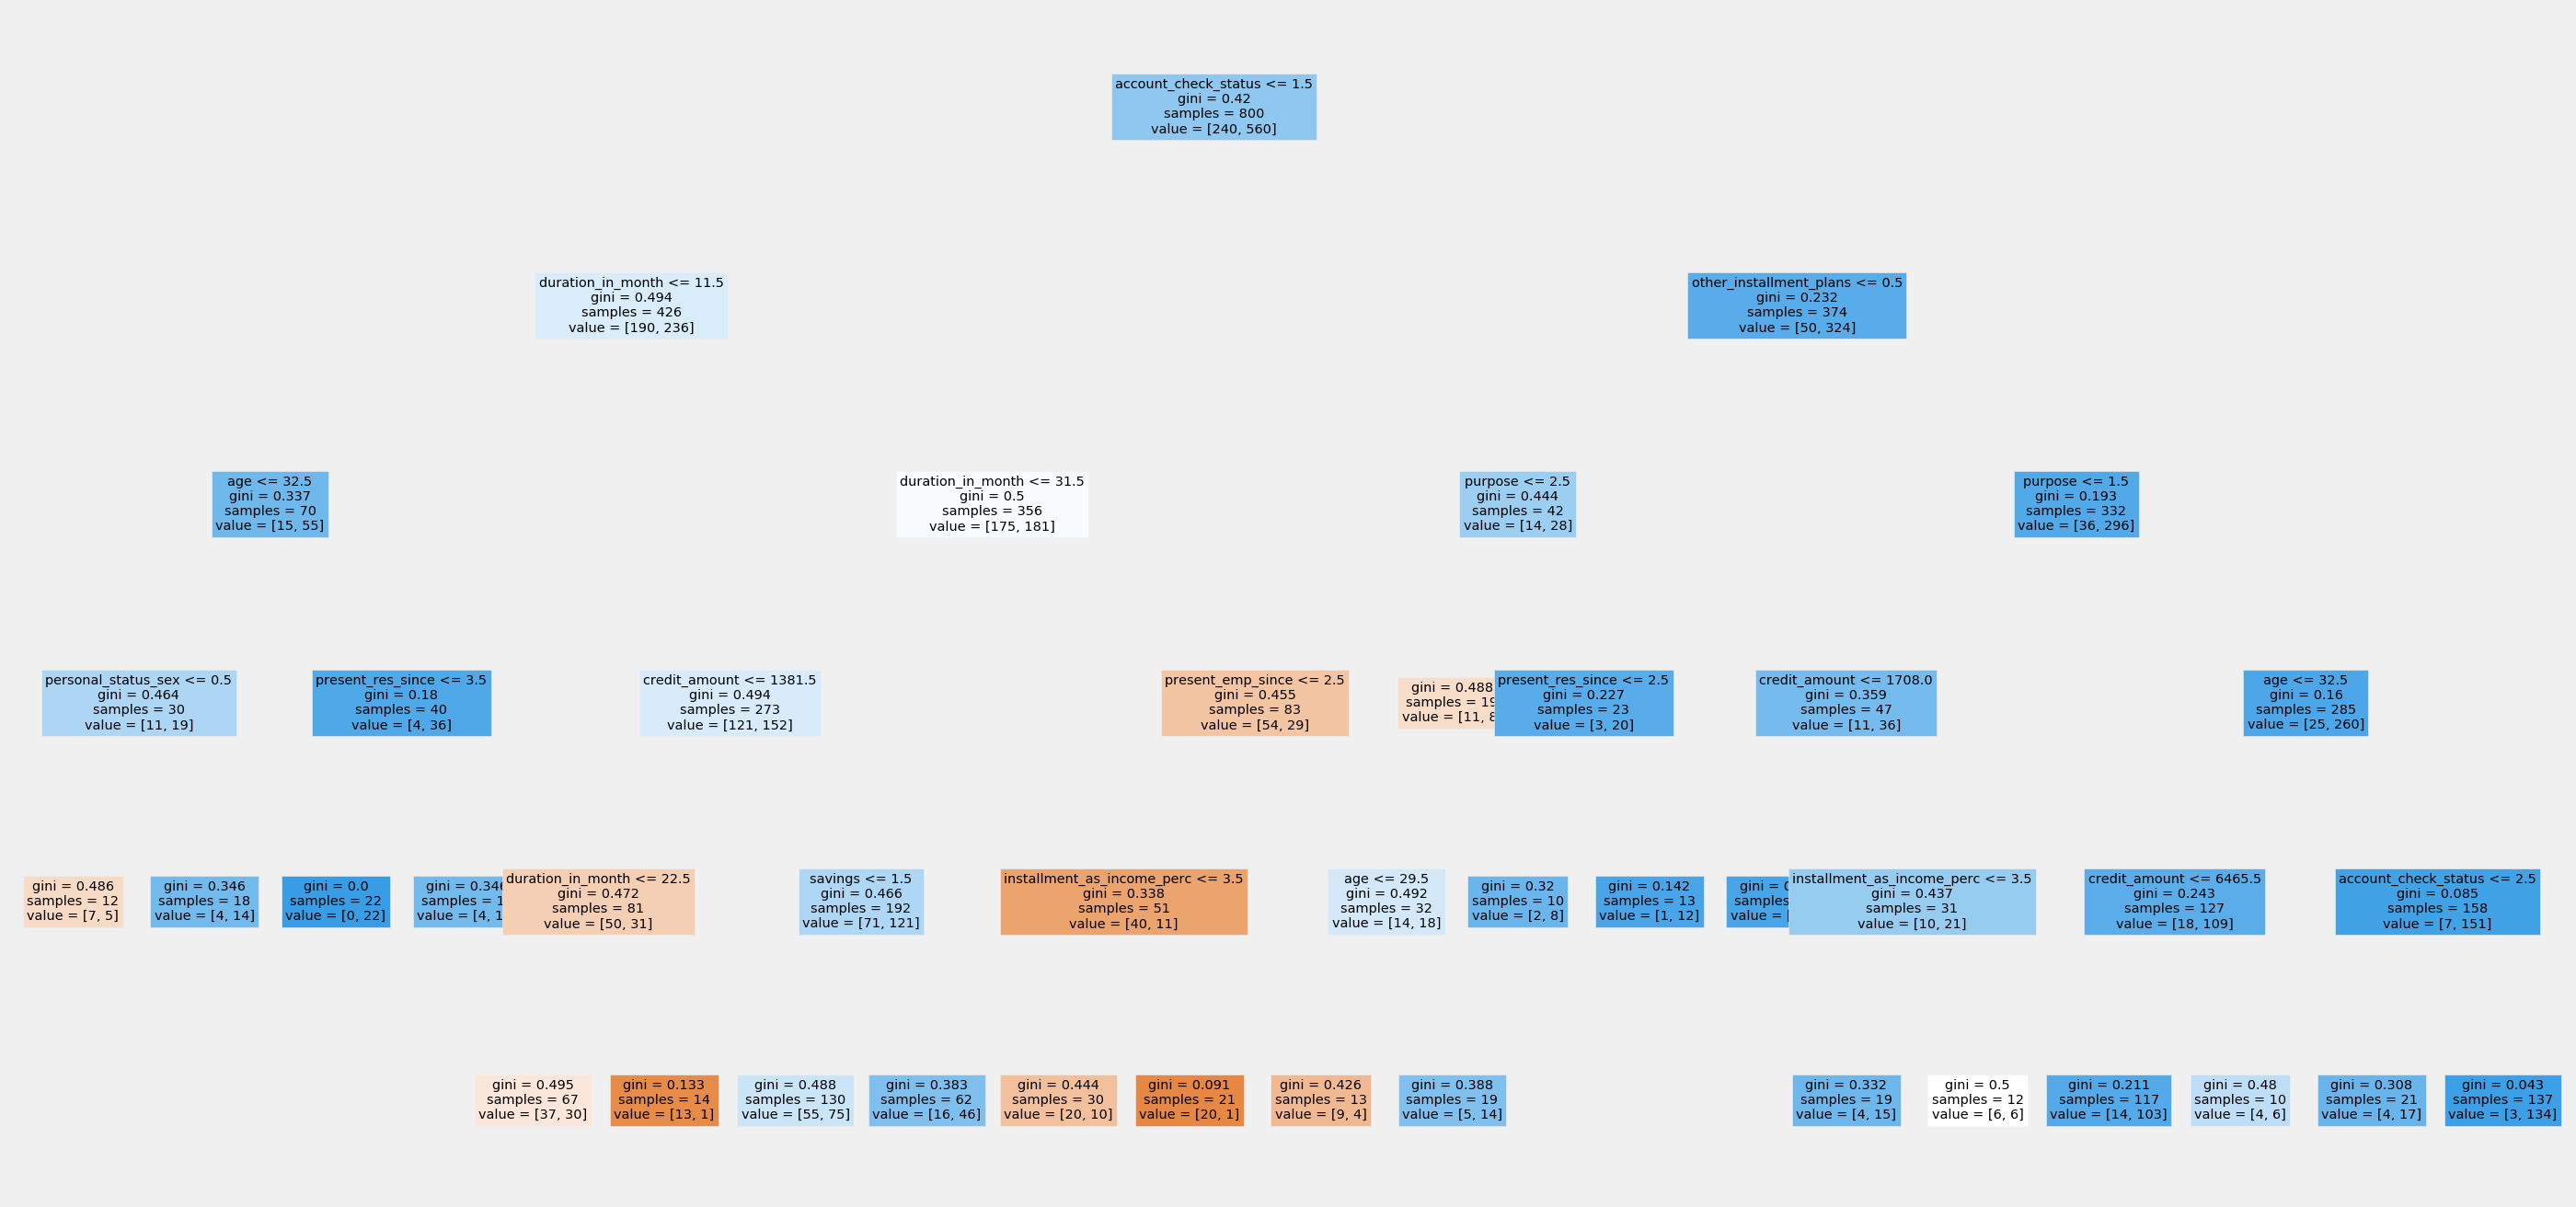

In [69]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=13,filled=True,feature_names=list(X))

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
parametrs = {'max_features': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2],
             'max_depth': range(10, 15), 'criterion': ['gini', 'entropy']}

In [72]:
rfc = RandomForestClassifier(n_estimators=60, random_state=42, n_jobs=-1, oob_score=True)

In [73]:
gcv= GridSearchCV(rfc, parametrs, n_jobs=-1, cv = 5, verbose=1)

In [74]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   44.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=60, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [75]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 9,
 'min_samples_leaf': 1}

In [76]:
best_clf = gcv.best_estimator_

In [77]:
best_clf.score(X_test, y_test)

0.8

In [78]:
y_pred = best_clf.predict(X_test)

In [79]:
precision_score(y_test, y_pred)

0.8205128205128205

In [80]:
recall_score(y_test, y_pred)

0.9142857142857143

In [81]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': X_train.columns,
                                'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,credit_amount,0.176357
0,account_check_status,0.132689
11,age,0.116291
1,duration_in_month,0.109974
3,purpose,0.073092
6,present_emp_since,0.049592
9,present_res_since,0.043413
5,savings,0.043226
2,credit_history,0.042919
7,installment_as_income_perc,0.039647


In [82]:
y_predicted_prob = best_clf.predict_proba(X_test)

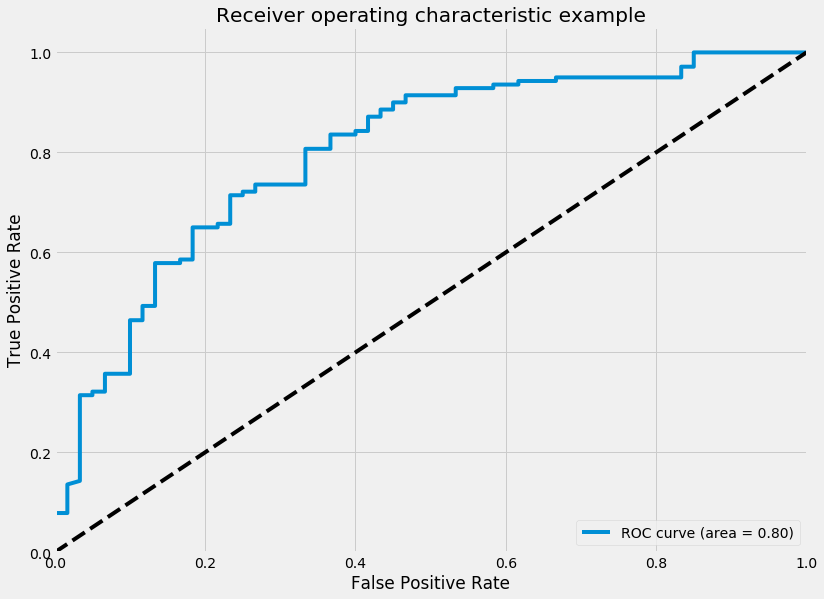

In [83]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

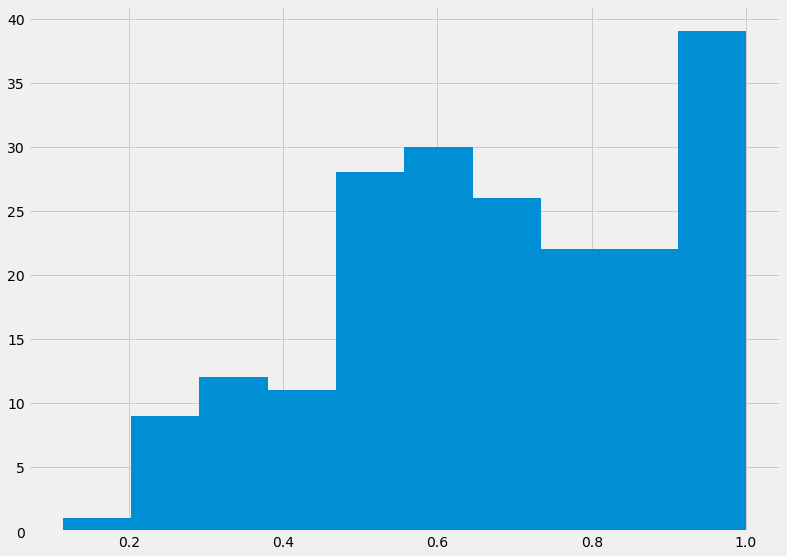

In [84]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [85]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.78104689, 0.49077091, 0.58333333, 0.96880081, 0.57950269,
       0.73963929, 0.93732206, 0.70032957, 0.48998071, 0.7465873 ,
       0.53435789, 0.86206592, 0.62428851, 0.25381149, 0.80737892,
       0.67594877, 0.69265545, 0.7827957 , 0.89067251, 0.76619071,
       0.80055082, 0.88021966, 0.51487193, 0.87982162, 0.86722408,
       0.34242424, 0.49071976, 0.40866972, 0.94882265, 0.21604953,
       0.82083333, 0.75012527, 0.73333333, 0.79752467, 0.55257507,
       0.71144079, 0.52042681, 0.70388087, 0.83451634, 0.58463748,
       0.88555556, 0.86337894, 0.94897959, 0.5397585 , 0.59781639,
       0.23333333, 0.51996187, 0.5       , 0.34339158, 0.80658089,
       0.88333333, 0.5824268 , 0.42837248, 0.95      , 0.95749279,
       0.87694444, 0.91666667, 0.70529214, 0.8826087 , 0.62248677,
       0.67882114, 0.49524061, 0.96419414, 1.        , 0.20373743,
       0.91564626, 0.9377261 , 0.98300652, 0.49089999, 0.93151008,
       0.98088768, 0.53412247, 0.62975354, 0.50658365, 0.99781

In [86]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [87]:
precision_score(y_test, y_pred)

0.9523809523809523

In [88]:
recall_score(y_test, y_pred)

0.2857142857142857

In [89]:
accuracy_score(y_test, y_pred)

0.49

In [90]:
y_new = pd.read_excel(r'C:\Users\aydar\Downloads\virtual_box_DOWNLOWD\bankir.xlsx')

In [91]:
y_new

,id_klienta,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,1,NaN,0 <= ... < 200 DM,12,all credits at this bank paid back duly,business,5000,100 <= ... < 500 DM,1 <= ... < 4 years,4,...,4,real estate,35,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
1,2,NaN,< 0 DM,4,no credits taken/ all credits paid back duly,car (new),10000,unknown/ no savings account,1 <= ... < 4 years,3,...,2,unknown / no property,22,bank,rent,1,unemployed/ unskilled - non-resident,2,"yes, registered under the customers name",yes


In [92]:
y_new.drop(['foreign_worker'], axis = 1, inplace = True)
y_new.drop(['other_debtors'], axis = 1, inplace = True)
y_new.drop(['people_under_maintenance'], axis = 1, inplace = True)
y_new.drop(['credits_this_bank'], axis = 1, inplace = True)
y_new.drop(['id_klienta'], axis = 1, inplace = True)
y_new.drop(['default'], axis = 1, inplace = True)

In [93]:
y_new["account_check_status"]=y_new["account_check_status"].map({'< 0 DM':1, '0 <= ... < 200 DM':0, 'no checking account':3,
                                '>= 200 DM / salary assignments for at least 1 year':2})

y_new["credit_history"]=y_new["credit_history"].map({"critical account/ other credits existing (not at this bank)":1,
                                "existing credits paid back duly till now":3,"delay in paying off in the past":2,
                                "all credits at this bank paid back duly":0, "no credits taken/ all credits paid back duly":4})

y_new["purpose"]=y_new["purpose"].map({"domestic appliances":4, "car (new)":2, "radio/television":7, "car (used)":3, 
                                "business":1, "(vacation - does not exist?)":0, "repairs":8, 'education':5,
                                'furniture/equipment':6,'retraining':9})              #'furniture/equipment':,'retraining':

y_new["savings"]=y_new["savings"].map({'.. >= 1000 DM':0, '500 <= ... < 1000 DM':3, '100 <= ... < 500 DM':2,
                                'unknown/ no savings account':4, '... < 100 DM':1})

y_new["present_emp_since"]=y_new["present_emp_since"].map({'unemployed':4, '... < 1 year': 1,
                                '4 <= ... < 7 years':3, '.. >= 7 years':0, '1 <= ... < 4 years':2})

y_new["personal_status_sex"]=y_new["personal_status_sex"].map({'male : divorced/separated':1, 'male : married/widowed':2,
                                'female : divorced/separated/married':0, 'male : single':3})

y_new["property"]=y_new["property"].map({'if not A121 : building society savings agreement/ life insurance':0,'real estate':2,
                                'unknown / no property':3, 'if not A121/A122 : car or other, not in attribute 6':1})

y_new["other_installment_plans"]=y_new["other_installment_plans"].map({'stores':2, 'bank':0, 'none':1})

y_new["housing"]=y_new["housing"].map({'for free':0, 'rent':2, 'own':1})

y_new["job"]=y_new["job"].map({ 'management/ self-employed/ highly qualified employee/ officer':0,'unskilled - resident':3,
                               'unemployed/ unskilled - non-resident':2, 'skilled employee / official':1})

y_new["telephone"]=y_new["telephone"].map({'yes, registered under the customers name':1, 'none':0})

In [94]:
y_new

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,present_res_since,property,age,other_installment_plans,housing,job,telephone
0,0,12,0,1,5000,2,2,4,3,4,2,35,1,1,1,1
1,1,4,4,2,10000,4,2,3,2,2,3,22,0,2,2,1


In [95]:
print(best_clf.predict(y_new))

[1 0]


In [444]:
from sklearn.ensemble import GradientBoostingClassifier

In [445]:
model = GradientBoostingClassifier()

In [446]:
max_depth = [2, 3, 4]

In [447]:
n_estimators = range(280, 460, 20)

In [448]:
learning_rate = [0.05, 0.1, 0.2]

In [449]:
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

In [450]:
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)

In [451]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [452]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 440}

In [453]:
best_clf = grid_search.best_estimator_

In [454]:
best_clf.score(X_test, y_test) #785

0.78

In [455]:
y_pred = best_clf.predict(X_test)

In [456]:
precision_score(y_test, y_pred)

0.8157894736842105

In [457]:
recall_score(y_test, y_pred)

0.8857142857142857

In [458]:
boost = GradientBoostingClassifier(learning_rate=0.03, n_estimators=500, max_depth=2).fit(X_train, y_train) #2 10 

In [459]:
boost_predict = boost.predict(X_test)

In [460]:
accuracy_score(y_test, boost_predict)

0.77

In [461]:
precision_score(y_test, boost_predict)

0.8092105263157895

In [462]:
recall_score(y_test, boost_predict)

0.8785714285714286

In [463]:
import xgboost as xgb
from xgboost import XGBClassifier

In [464]:
model = xgb.XGBClassifier() #learn 0.3/ depth 3/ est 46

In [465]:
n_estimators = range(43, 50)

In [466]:
max_depth = [2, 3, 4]

In [467]:
learning_rate = [0.3]

In [468]:
eta = [0.001]

In [469]:
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, eta=eta)

In [470]:
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)

In [471]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [472]:
grid_search.best_params_

{'eta': 0.001, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 48}

In [473]:
best_clf = grid_search.best_estimator_

In [474]:
best_clf.score(X_test, y_test) #785

0.785

In [475]:
y_pred = best_clf.predict(X_test)

In [476]:
precision_score(y_test, y_pred)

0.8129032258064516

In [477]:
recall_score(y_test, y_pred)

0.9

In [ ]:
account_check_status={'< 0 DM':1, '0 <= ... < 200 DM':0, 'no checking account':3,
                      '>= 200 DM / salary assignments for at least 1 year':2}
X["account_check_status"]=X["account_check_status"].map(account_check_status)

credit_history={"critical account/ other credits existing (not at this bank)":1,"existing credits paid back duly till now":3,
                "delay in paying off in the past":2,"all credits at this bank paid back duly":0,
                "no credits taken/ all credits paid back duly":4}
X["credit_history"]=X["credit_history"].map(credit_history)

purpose={"domestic appliances":4, "car (new)":2, "radio/television":7, "car (used)":3, "business":1,
         "(vacation - does not exist?)":0, "repairs":8, 'education':5,'furniture/equipment':6,'retraining':9}
X["purpose"]=X["purpose"].map(purpose)

savings={'.. >= 1000 DM':0, '500 <= ... < 1000 DM':3, '100 <= ... < 500 DM':2, 'unknown/ no savings account':4, '... < 100 DM':1}
X["savings"]=X["savings"].map(savings)

present_emp_since={'unemployed':4, '... < 1 year': 1, '4 <= ... < 7 years':3, '.. >= 7 years':0, '1 <= ... < 4 years':2}
X["present_emp_since"]=X["present_emp_since"].map(present_emp_since)

personal_status_sex={'male : divorced/separated':1, 'male : married/widowed':2,'female : divorced/separated/married':0,
                    'male : single ':3}
X["personal_status_sex"]=X["personal_status_sex"].map(personal_status_sex)

property={'unknown / no property':3, 'if not A121 : building society savings agreement/ life insurance':0,
         'real estate':2, 'if not A121/A122 : car or other, not in attribute 6':1}
X["property"]=X["property"].map(property)

other_installment_plans={'stores':2, 'bank':0, 'none':1}
X["other_installment_plans"]=X["other_installment_plans"].map(other_installment_plans)

housing={'for free':0, 'rent':2, 'own':1}
X["housing"]=X["housing"].map(housing)

job={'unemployed/ unskilled - non-resident':2, 'management/ self-employed/ highly qualified employee/ officer':0,
    'unskilled - resident ':3, 'skilled employee / official ':1}
X["job"]=X["job"].map(job)

telephone={'yes, registered under the customers name':1, 'none':0}
X["telephone"]=X["telephone"].map(telephone)

In [ ]:
account_check_status={'< 0 DM':1, '0 <= ... < 200 DM':0, 'no checking account':3,
                      '>= 200 DM / salary assignments for at least 1 year':2}
y_new["account_check_status"]=y_new["account_check_status"].map(account_check_status)

credit_history={"critical account/ other credits existing (not at this bank)":1,"existing credits paid back duly till now":3,
                "delay in paying off in the past":2,"all credits at this bank paid back duly":0,
                "no credits taken/ all credits paid back duly":4}
y_new["credit_history"]=y_new["credit_history"].map(credit_history)

purpose={"domestic appliances":4, "car (new)":2, "radio/television":7, "car (used)":3, "business":1,
         "(vacation - does not exist?)":0, "repairs":8, 'education':5,'furniture/equipment':6,'retraining':9}#'furniture/equipment':,'retraining':
y_new["purpose"]=y_new["purpose"].map(purpose)

savings={'.. >= 1000 DM':0, '500 <= ... < 1000 DM':3, '100 <= ... < 500 DM':2, 'unknown/ no savings account':4, '... < 100 DM':1}
y_new["savings"]=y_new["savings"].map(savings)

present_emp_since={'unemployed':4, '... < 1 year': 1, '4 <= ... < 7 years':3, '.. >= 7 years':0, '1 <= ... < 4 years':2}
y_new["present_emp_since"]=y_new["present_emp_since"].map(present_emp_since)

personal_status_sex={'male : divorced/separated':1, 'male : married/widowed':2,'female : divorced/separated/married':0,
                    'male : single':3}
y_new["personal_status_sex"]=y_new["personal_status_sex"].map(personal_status_sex)

property={'unknown / no property':3, 'if not A121 : building society savings agreement/ life insurance':0,
         'real estate':2, 'if not A121/A122 : car or other, not in attribute 6':1}
y_new["property"]=y_new["property"].map(property)

other_installment_plans={'stores':2, 'bank':0, 'none':1}
y_new["other_installment_plans"]=y_new["other_installment_plans"].map(other_installment_plans)

housing={'for free':0, 'rent':2, 'own':1}
y_new["housing"]=y_new["housing"].map(housing)

job={'unemployed/ unskilled - non-resident':2, 'management/ self-employed/ highly qualified employee/ officer':0,
    'unskilled - resident':3, 'skilled employee / official':1}
y_new["job"]=y_new["job"].map(job)

telephone={'yes, registered under the customers name':1, 'none':0}
y_new["telephone"]=y_new["telephone"].map(telephone)

In [ ]:
y_new["housing"] = y_new["housing"].map({'for free' : 1, 'own': 2 , 'rent': 3})